In [ ]:
#importing packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#$\Large \textbf{Solution to problem 1}$

#part a : Visualizing and pre-processing data

In [ ]:
from google.colab import files
file_uploaded = files.upload()
for i in file_uploaded.keys() :
  print("You have uploaded file {file} and file size is {len} bytes".format(file = i , len = len(i)))


Saving DataClustering.csv to DataClustering.csv
You have uploaded file DataClustering.csv and file size is 18 bytes


In [ ]:
train_df = pd.read_csv("/content/DataClustering.csv")
display(train_df)


,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


$\text{There are 4 columns in the data file and each column contains 351 rows.}$

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


$\text{NO columns contains null values and every values column contains are unique.}$ \\
$\text{All the columns content continous data points i.e. float64 and none is object or string.}$

In [ ]:
train_df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


$\text{Mean and standard deviation have variation and may lead to outliers having more importance. Transformation is needed like log , power or exponential.}$

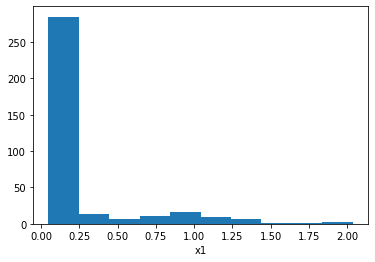

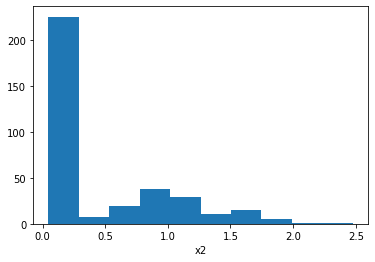

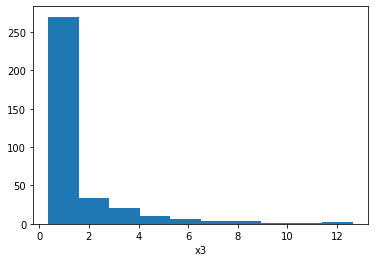

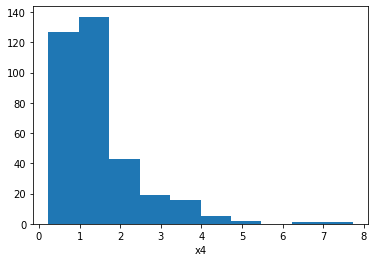

In [ ]:
for col in train_df.columns.values :
  plt.hist(train_df[col])
  plt.xlabel(col)
  plt.show()

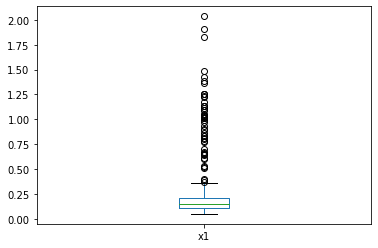

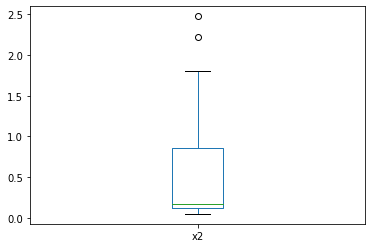

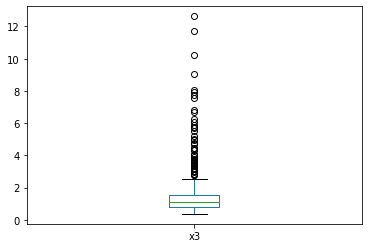

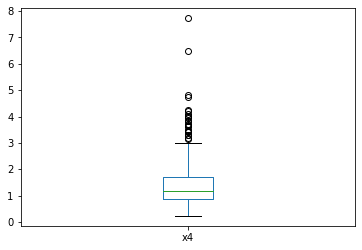

In [ ]:
for col in train_df.columns.values :
  train_df.boxplot(column = col , grid = False , by = None)
  plt.show()

$\text{From histogram of columns data , it is clear that the histograms are right skewed and more data points are accumulated in range(0,2) this might create bias while clustering.}$ \\
$\text{From boxplot we can see that data has many outliers.}$
$\text{We can try power , exponential or log transformation}$ \\
$\text{As from histogram the data seems to have power law distribution. Trying log transform.}$ \\
$\text{Reference :}$
 https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
from sklearn.preprocessing import FunctionTransformer
col = train_df.columns.values
transformer = FunctionTransformer(np.log1p, validate=True)
new_data = transformer.transform(train_df)
data = pd.DataFrame(new_data , columns = col)
data.head(3)

,x1,x2,x3,x4
0,0.605602,0.871054,0.674080,0.689978
1,0.813632,0.916485,0.644019,0.552755
2,0.681557,0.721989,0.796394,0.857491


In [ ]:
data.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.219780,0.336533,0.861058,0.851954
std,0.212522,0.305263,0.416867,0.321771
min,0.047460,0.045950,0.313143,0.209095
25%,0.105567,0.109084,0.596185,0.619472
50%,0.142699,0.153308,0.734063,0.784356
75%,0.192735,0.617735,0.939055,1.002271
max,1.110911,1.245916,2.612683,2.166404


$\text{After log transform we can see that variance and mean are not as much varied as in the original data}$

#part b : k-Means training and finding k

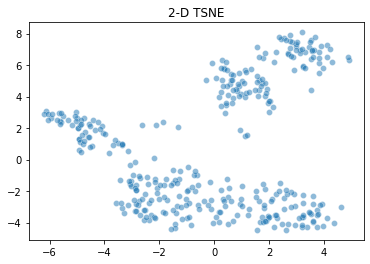

In [ ]:
#visualising tSNE
from sklearn.manifold import TSNE
train_X = data
tsne = TSNE(n_components=2,perplexity=100)
tsne_dims =tsne.fit_transform(np.array(train_X))
sns.scatterplot(x=tsne_dims[:,0],y=tsne_dims[:,1],alpha=.5)
plt.title('2-D TSNE')
plt.show()

$\text{Using Silhouette score as measure to decide k }$ \\

$\text{Reference :}$ https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb $\text{and ML for smart monkeys module}$

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_range = np.arange(2,10) # trying for k in range [2,10]
trials_per_k = 5 #performing 5 trials per k value
total_k = k_range.shape[0] #value of k 
score = np.zeros(total_k) # score is median score from 5 trials

for k_num in range(0,total_k):
  kmeans = KMeans(n_clusters = k_range[k_num]).fit(train_X) #fitting data
  trial_score = np.zeros(trials_per_k)
  for trial in range(0,trials_per_k):
    labels = kmeans.labels_   #get labels from KMeans
    trial_score[trial] = metrics.silhouette_score(train_X,labels , metric = 'euclidean')  #using silhouette score with distance as in euclidean distance between point and centroid
  score[k_num] = np.median(trial_score) #store median of score 
  print('For %d clusters,score is %f  ' %(k_num+2 , score[k_num]))


For 2 clusters,score is 0.402478  
For 3 clusters,score is 0.406353  
For 4 clusters,score is 0.388558  
For 5 clusters,score is 0.409768  
For 6 clusters,score is 0.399445  
For 7 clusters,score is 0.354619  
For 8 clusters,score is 0.334770  
For 9 clusters,score is 0.317037  


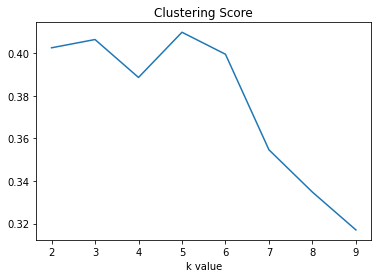

In [ ]:
plt.plot(k_range, score )
plt.title('Clustering Score')
plt.xlabel('k value')
plt.show()

$\text{Using Silhoouette criteria to calculate score, which considers euclidean distance. we obtain k value as 5}$

$\text{visualising TSNE embedding}$

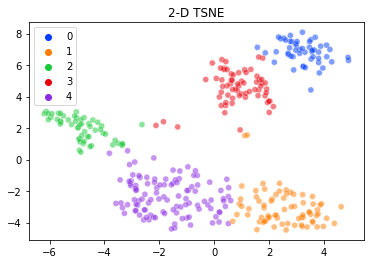

In [ ]:
kmeans = KMeans(n_clusters = 5).fit(train_X) #fitting data for 5 clusters i.e. k = 5
labels = kmeans.labels_
sns.scatterplot(x=tsne_dims[:,0],y= tsne_dims[:,1],hue=labels,palette='bright',alpha=0.5)
plt.title("2-D TSNE")
plt.legend()
plt.show()

$\textbf{We can confirm from above method that k = 5}$

#part c: training DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
eps_list = [0.1,0.2,0.3,0.4,0.5,0.6] #checking for different eps value . eps value is the distance upto which we consider the points in same cluster hence keeping it minimum
sample = [5,6,7,8,9,10] #min no. of points to form cluster , considering points which are : dimensions or features of data < points < 2*k value from kmeans
p,q = [],[] #storing noise and cluster numbers

for i in eps_list :
  for j in sample :
    Clustering = DBSCAN(eps= i, min_samples= j).fit(train_X)
    core_samples_mask = np.zeros_like(Clustering.labels_, dtype=bool)
    core_samples_mask[Clustering.core_sample_indices_] = True
    labels = Clustering.labels_ 
    unique_labels = set(labels)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    p.append(n_clusters)
    q.append(n_noise)

    if n_clusters == 4 : #as we have subtracted 1 for -1 label 
      print("\nFor obtaining 5 clusters as obtained in k-means")
      print("eps value is %f snd min samples are %f " %(i, j))
      print('Estimated number of noise points: %d' % n_noise)



For obtaining 5 clusters as obtained in k-means
eps value is 0.100000 snd min samples are 5.000000 
Estimated number of noise points: 250

For obtaining 5 clusters as obtained in k-means
eps value is 0.100000 snd min samples are 7.000000 
Estimated number of noise points: 274

For obtaining 5 clusters as obtained in k-means
eps value is 0.200000 snd min samples are 8.000000 
Estimated number of noise points: 78

For obtaining 5 clusters as obtained in k-means
eps value is 0.200000 snd min samples are 10.000000 
Estimated number of noise points: 107


$\text{Here we can see that for  $\epsilon$ = 0.1 and  min points = 5 , 7 and for $\epsilon$ = 0.2 and  minpts = 8 , 10 . we can obtain the same number of clusters as obtained in K-Means.}$ \\
$\text{But the noise points will be different in the different clusters formed by these value sets.}$

#part d : Visualising t-sne using cluster assignment as label

---


$\text{We get minimum noise points at $\epsilon$ value = 0.2 and min samples  = 8 in DBSCAN .Using that for visualing t-sne by using cluster assignment as label.}$

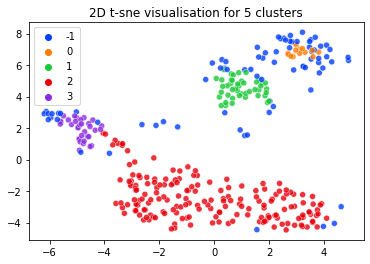

In [ ]:
Clustering = DBSCAN(eps= 0.2, min_samples= 8).fit(train_X)
labels = Clustering.labels_
sns.scatterplot(x = tsne_dims[:,0] , y = tsne_dims[:,1] , hue = labels , palette = "bright" , alpha = 0.8)
plt.title("2D t-sne visualisation for %d clusters" % len(pd.unique(labels)))
plt.show()

#$\Large \textbf{Solution to problem 2}$

#part a : Visualising and pre-processing PCA file

In [ ]:
file_uploaded = files.upload()
for i in file_uploaded.keys() :
  print("You have uploaded file {file} and file size is {len} bytes".format(file = i , len = len(i)))

Saving DataPCA.csv to DataPCA.csv
You have uploaded file DataPCA.csv and file size is 11 bytes


In [ ]:
train_df = pd.read_csv("/content/DataPCA.csv")
display(train_df)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [ ]:
train_df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


$\text{File has 7 features(columns) and 190 rows.All the columns in data set contains continuous values i.e. float64 and there are no null values in dataset.}$

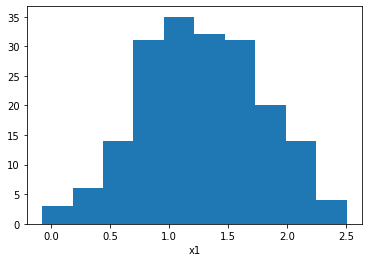

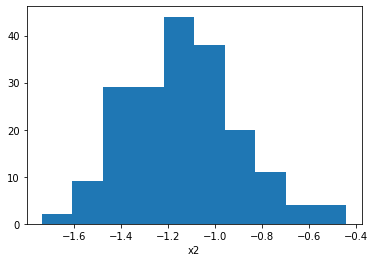

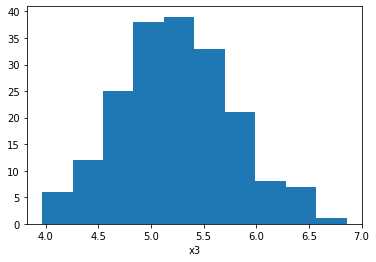

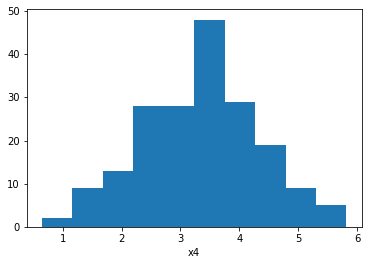

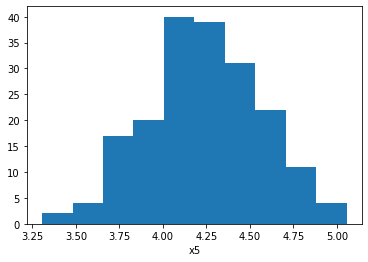

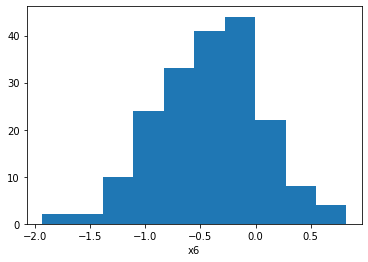

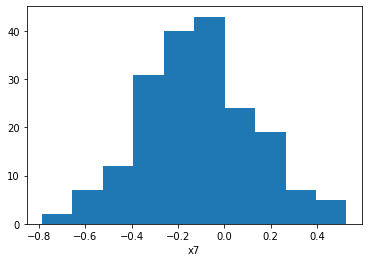

In [ ]:
for col in train_df.columns.values :
  plt.hist(train_df[col])
  plt.xlabel(col)
  plt.show()

$\text{The features (columns) seems to have normal distribution , some outliers are there as the plot is not entirely gaussian bell shaped but can be normalise using standard scalar.}$

In [ ]:
train_df.columns.values

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype=object)

In [ ]:
#fitting standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = train_df.columns.values
X_train = scaler.fit_transform(train_df)
X_train = pd.DataFrame(X_train , columns = columns)

In [ ]:
X_train.describe()

,x1,x2,x3,x4,x5,x6,x7
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02
mean,1.051790e-17,-4.890825e-16,8.688956e-16,4.177945e-16,-2.178521e-15,9.641410e-17,4.996004e-17
std,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00
min,-2.681699e+00,-2.565362e+00,-2.350181e+00,-2.711687e+00,-2.832879e+00,-3.169225e+00,-2.792006e+00
25%,-7.063108e-01,-6.968414e-01,-6.775764e-01,-7.023327e-01,-6.510581e-01,-6.834685e-01,-6.656180e-01
50%,-3.076318e-02,-4.300486e-02,-9.747732e-03,5.874870e-02,2.534350e-02,7.274151e-02,-1.586079e-02
75%,6.918035e-01,5.929503e-01,6.765831e-01,6.586803e-01,7.001440e-01,6.583283e-01,6.526457e-01
max,2.400735e+00,2.978622e+00,2.925970e+00,2.492669e+00,2.511689e+00,2.570934e+00,2.701991e+00


$\text{After preprocessing we can see that its now gaussian normal distribution as mean is zero and standard deviation 1.}$

#part b : Training PCA

$\text{Reference :}$ https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
train = pca.fit_transform(X_train)

#part c : variance explained vs components plot

In [ ]:
variance = pca.explained_variance_ratio_
print("Variance from PCA is :\n",variance)
dimensions = pca.n_components_
print("Dimensions after fitting PCA are :\n", dimensions)

Variance from PCA is :
 [6.09270567e-01 3.19460967e-01 6.49562011e-02 6.07238580e-03
 2.16027661e-04 1.98460843e-05 4.00494511e-06]
Dimensions after fitting PCA are :
 7


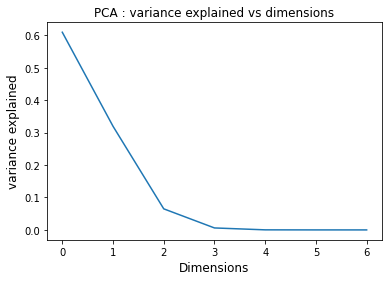

In [ ]:
plt.plot(range(dimensions) , variance)
plt.title("PCA : variance explained vs dimensions",fontsize = 12)
plt.xlabel("Dimensions",fontsize = 12)
plt.ylabel("variance explained" , fontsize = 12)
plt.show()

$\text{feature 1 and 2 has high variance and feature 4,5,6,7 have the least variance.}$

#part d : Reconstructing data and calculating MSE

$\text{MSE formula is}$ $ \frac{1}{n} ((\sum_{i = 1}^{n} ||x_i||^2 )
- \sum_{i=1}^{n} (w.x)^2)$ $\text{but I will be using module mean_squared_error ,  from sklearn.metrics}$ 

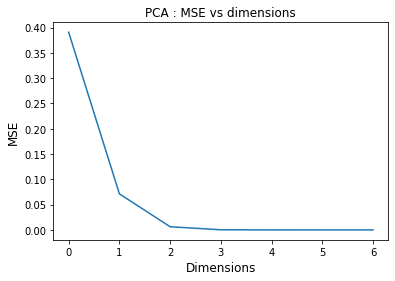

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
mean_sqrd_err = []
for i in range(1,dimensions+1) : #atleast 1 feature space should be present
  pca_new = PCA(n_components = i) #Reconstructing for 1,2,3,4,5,6,7 feature space
  x_new = pca_new.fit_transform(train) #fitting new PCA to original data
  x_pred = pca_new.inverse_transform(x_new) #predicting from new data which has i feature for original dimensions i.e. 7
  mean_sqrd_err.append(MSE(train,x_pred)) #storing MSE

#plot
plt.plot(range(len(mean_sqrd_err)) , mean_sqrd_err)
plt.title("PCA : MSE vs dimensions",fontsize = 12)
plt.xlabel("Dimensions",fontsize = 12)
plt.ylabel("MSE" , fontsize = 12)
plt.show()

$\text{MSE is minimum when dimensions of PCA are more and we get minimum squared error when we predict using original dimensions available.}$

#$\Large \textbf{Solution to problem 3}$

#part a : Visualize and pre-processing

In [ ]:
file_uploaded = files.upload()
for i in file_uploaded.keys() :
  print("You have uploaded file {file} and file size is {len} bytes".format(file = i , len = len(i)))
train_df = pd.read_csv("/content/DataKPCA.csv")

Saving DataKPCA.csv to DataKPCA.csv
You have uploaded file DataKPCA.csv and file size is 12 bytes


In [ ]:
display(train_df)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


$\text{Data file has 190 rows and 7 columns , hence we can say that originally there are 7 features present.}$

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


$\text{All the columns contains continuous values i.e. dtype = float64 . There is no missing data or null values in any columns.}$

In [ ]:
train_df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


$\text{mean and standard deviation is very different for different features and depending upon the histogram , we may need to transform the data before fitting KPCA}$ $\text{As KPCA depends on the distribution of data and may involve biased data due to outliers.}$

x1


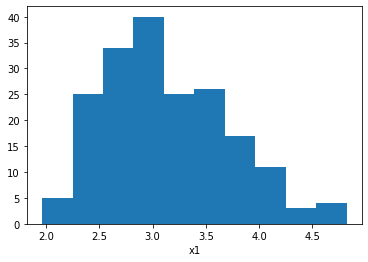

x2


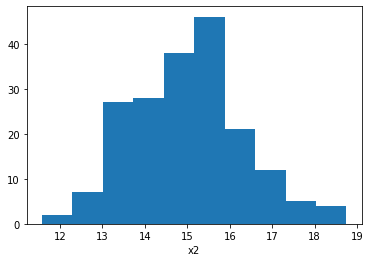

x3


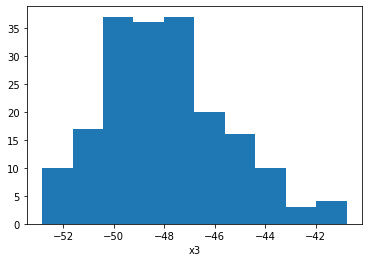

x4


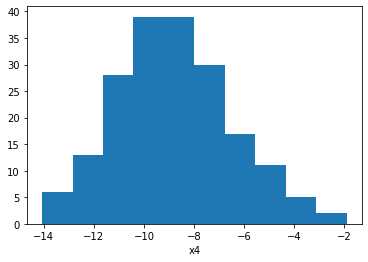

x5


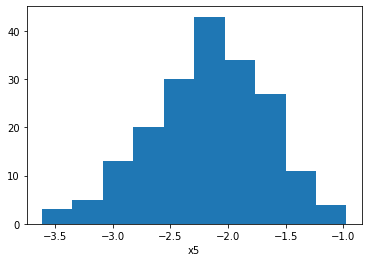

x6


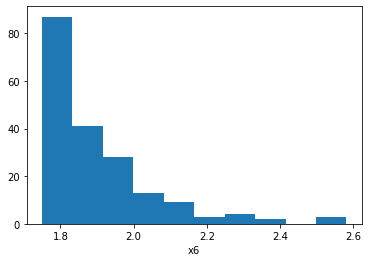

x7


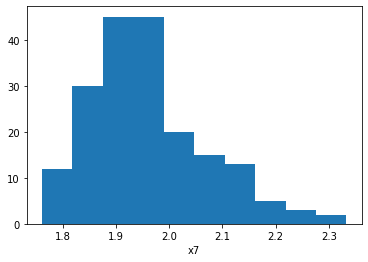

In [ ]:
column = []
for col in train_df.columns.values :
  plt.hist(train_df[col])
  plt.xlabel(col)
  column.append(col)
  print(col)
  plt.show()

$\text{sample points in feature $x_6$ are right skewed and rest all features are somewhat normally distributed.}$ \\
$\text{As most features are normally distributed we can just fit a standardscalar and use the data to fit KPCA.}$

In [ ]:
#preprocessing
#fitting standard scalar
scalar = StandardScaler()
training = scalar.fit_transform(train_df)
training = pd.DataFrame(training , columns = column)
training.head(3)

,x1,x2,x3,x4,x5,x6,x7
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011


In [ ]:
training.describe()

,x1,x2,x3,x4,x5,x6,x7
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02
mean,4.838235e-16,1.360315e-15,-4.283124e-16,2.982994e-16,5.105930e-16,-1.106133e-15,1.743050e-15
std,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00
min,-1.969901e+00,-2.631265e+00,-2.008924e+00,-2.255154e+00,-2.849651e+00,-9.040358e-01,-1.815341e+00
25%,-7.524304e-01,-6.934135e-01,-7.446873e-01,-6.781271e-01,-6.674832e-01,-7.552913e-01,-7.195187e-01
50%,-1.398125e-01,-3.264538e-02,-1.125178e-01,-1.005014e-01,3.838619e-02,-2.611607e-01,-1.470836e-01
75%,6.260622e-01,6.014429e-01,6.132157e-01,6.761279e-01,6.876498e-01,3.809776e-01,5.579842e-01
max,2.892812e+00,2.904366e+00,2.909625e+00,2.961942e+00,2.384287e+00,4.314800e+00,3.452963e+00


$\text{After preprocessing and fitting standard scalar the data is now ready to be trained.}$

#part b : Training KPCA

$\text{Reference :}$ https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf' , n_components = len(training.columns.values))
X_new = kpca.fit_transform(training)

In [ ]:
pd.DataFrame(X_new,columns =column).head()

,x1,x2,x3,x4,x5,x6,x7
0,-0.511021,0.223518,-0.197079,-0.082155,0.336981,-0.083734,-0.105992
1,0.005381,-0.235126,-0.485855,-0.058948,0.022616,0.042628,0.030444
2,0.255310,0.197993,-0.338920,0.059996,-0.095980,-0.381453,0.210417
3,-0.349442,0.206954,0.488276,-0.004865,0.335636,-0.046984,0.335552
4,0.500814,-0.186746,-0.200689,-0.095078,0.068398,0.131177,0.125235


$\text{training KPCA using  parameters with kernel 'rbf'  and feature space as original feature space yeild the above results.}$$\text{ Here , as our data is gaussian like hence  I have used rbf kernel.}$

#part c : Variance explained vs dimensions

$\text{variance explained is just the percentage of variance with respect to total variance and hence we can calculate it as below.}$ \\
$\text{idea and math behind this procedure is inspired from :}$ https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance/40687862

In [ ]:
#fitting for 10 dimensions 
kpca = KernelPCA(kernel = 'rbf', n_components=10)
x_pred = kpca.fit_transform(training)

#calculating variance using numpy library
variance = np.var(x_pred , axis = 0)
print("Variance are :\n" , variance)
explained_var_ratio = variance/np.sum(variance)
print("Explained variance ratio are :\n",explained_var_ratio)

Variance are :
 [0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645
 0.02913138 0.02046354 0.01659669 0.01434459]
Explained variance ratio are :
 [0.26572199 0.19077288 0.17868422 0.08218296 0.07659326 0.06152568
 0.0522751  0.03672101 0.0297821  0.02574081]


In [ ]:
dimension = kpca.n_components
print(dimension)

10


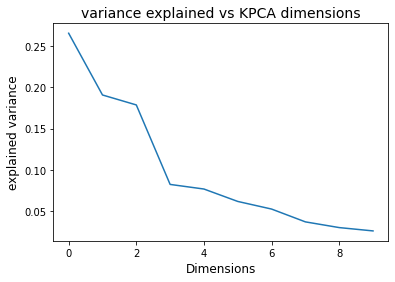

In [ ]:
#plot
plt.plot(range(dimension) , explained_var_ratio)
plt.title("variance explained vs KPCA dimensions" , fontsize = 14)
plt.xlabel("Dimensions" , fontsize = 12)
plt.ylabel("explained variance" , fontsize = 12)
plt.show()

$\text{From above plot we can say that feature $x_1 , x_2 , x_3$ have more variance than other features and variance reduces to 0 if we fit for more dimensions than original dimensions.}$